# 🛒 Taller: Predicción de compras con árboles de decisión

**Objetivo:** Predecir si una persona realizará una compra (`Purchased`) a partir de características como edad, salario estimado y género.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv

--2025-04-09 21:54:28--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv [following]
--2025-04-09 21:54:28--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2025-04-09 21:54:28 (49.6 MB/s) - ‘tita

## 📥 1. Carga y exploración del dataset

In [2]:
import pandas as pd

# Cargar el dataset
data = pd.read_csv('titanic_train.csv')

# Mostrar las primeras filas del dataset
print(data.head())

# Obtener información general sobre el dataset
print(data.info())

# Estadísticas descriptivas
print(data.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

### ❓ Preguntas:
- ¿Cuántas observaciones y columnas tiene el dataset?
- ¿Cuál es la variable que queremos predecir?
- ¿Qué tipos de variables tenemos?

El dataset tiene 891 observaciones y 12 columnas.

La variable a predecir es "Survived".

El dataset contiene diferentes tipos de variables:

* **Numéricas:**  Age, Fare, SibSp, Parch, PassengerId
* **Categóricas:** Survived, Pclass, Sex, Ticket, Cabin, Embarked, Name


## 🛠️ 2. Preprocesamiento y definición de variables: ¿Que variables tengo que borrar, cuales tengo que convertir a numérica, tengo valores nulos?

In [3]:
import pandas as pd
# Check for missing values
print(data.isnull().sum())

# Drop columns unlikely to be predictive or with too many missing values
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Fill missing values in 'Age' with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Alternatively, fill missing values in 'Embarked' with the most frequent value
# data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  #Already handled by get_dummies

print(data.info())
print(data.head())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB
None
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       

<ipython-input-3-19f4fc18992d>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


**Variables a borrar:**

Se han borrado 'PassengerId', 'Name', 'Ticket' y 'Cabin'.  'PassengerId' no aporta información predictiva, 'Name' y 'Ticket' parecen irrelevantes para la predicción de supervivencia y 'Cabin' tiene demasiados valores nulos.

**Variables a convertir a numéricas:**

Las variables categóricas 'Sex' y 'Embarked' se han convertido a numéricas usando *one-hot encoding*.  Esto crea nuevas columnas binarias (0 o 1) para cada categoría.  Por ejemplo, 'Sex' se divide en 'Sex_male' (donde 1 significa masculino y 0 femenino).  Se elimina la primera columna para evitar la multicolinealidad.

**Valores nulos:**

* **Edad ('Age'):**  Tenía valores nulos, que se han rellenado con la mediana de la edad.  Se podría explorar otras opciones para rellenar la edad, pero la mediana es una opción razonable.

* **Embarked:** Se ha usado One Hot Encoding, que maneja los nulos adecuadamente.



### ❓ Pregunta:
- ¿Está balanceada la variable objetivo?

In [4]:
# prompt: ¿Está balanceada la variable objetivo?

# Check the balance of the target variable 'Survived'
print(data['Survived'].value_counts(normalize=True))


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


## ✂️ 3. División del dataset

In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (712, 8)
X_test shape: (179, 8)
y_train shape: (712,)
y_test shape: (179,)


## 🌳 4. Entrenamiento de un modelo base sin optimización: Mida las metricas del train y el test set y piense. ¿Hay evidencia de Overfiting?

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)  # Use a random state for reproducibility
clf.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate the model
print("Training Set Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))


print("\nTesting Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


Training Set Metrics:
Accuracy: 0.9789325842696629
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       444
           1       1.00      0.95      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712

[[443   1]
 [ 14 254]]

Testing Set Metrics:
Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

[[84 21]
 [18 56]]


#Sí, hay evidencia de overfitting. La precisión en el conjunto de entrenamiento es significativamente mayor que la precisión en el conjunto de prueba.
#Esto indica que el modelo ha aprendido los datos de entrenamiento demasiado bien, incluyendo el ruido y las peculiaridades específicas de ese conjunto,
#y por lo tanto no generaliza bien a nuevos datos (el conjunto de prueba).  Un modelo con overfitting  tendrá un buen rendimiento en los datos de entrenamiento,
#pero un rendimiento pobre en los datos no vistos.


### ❓ Pregunta:
- ¿Qué tan bien predice el modelo base?
- ¿Existen diferencias entre precisión y recall?

El modelo base, un árbol de decisión sin optimización, muestra un claro indicio de *overfitting*.  Su precisión en el conjunto de entrenamiento es alta, pero baja considerablemente en el conjunto de prueba. Esto significa que el modelo memorizó los datos de entrenamiento en lugar de aprender patrones generales.


En cuanto a la precisión y el recall, sí existen diferencias.  La precisión se refiere a la proporción de predicciones positivas correctas entre todas las predicciones positivas.  El recall (o sensibilidad) se refiere a la proporción de predicciones positivas correctas entre todas las instancias realmente positivas.  Un modelo con alta precisión tiene pocas falsas alarmas, mientras que un modelo con alto recall tiene pocas instancias positivas perdidas.

En el caso particular del modelo base del código proporcionado, observe la diferencia en la precisión (precision) y el recall (recall) para la clase 1 (sobrevivientes) en el *testing set*:


En el conjunto de prueba, el modelo tiene un recall de 0.70 y una precisión de 0.74.


La diferencia no es muy pronunciada en este caso, pero es crucial examinar el contexto del problema.  Si el objetivo es minimizar las instancias positivas perdidas, el recall es más relevante. Si, en cambio, el objetivo es minimizar las falsas alarmas, la precisión es la métrica clave.  Para este ejemplo, el contexto (predicción de supervivencia) indica que las falsas alarmas (decir que alguien sobrevive cuando realmente no lo hizo) no son tan negativas como decir que alguien no sobrevivirá cuando sí lo hace.  Un buen recall (alto valor) es por tanto más importante.  En este caso, se busca un modelo con buen recall.


## 🔁 5. Evaluación con validación cruzada

In [11]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5) # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.74301676 0.78089888 0.79775281 0.74719101 0.83707865]
Average cross-validation score: 0.7811876216182286


## 🔧 6. Optimización con GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model on the testing set
best_clf = grid_search.best_estimator_
y_test_pred = best_clf.predict(X_test)
print("\nTesting Set Metrics (Optimized Model):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.8062149118487147

Testing Set Metrics (Optimized Model):
Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

[[93 12]
 [17 57]]


## ✅ 7. Evaluación del mejor modelo: Cuales son las metricas y la matriz de confusion de este modelo

In [13]:
print("\nTesting Set Metrics (Optimized Model):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))



Testing Set Metrics (Optimized Model):
Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

[[93 12]
 [17 57]]


## 📈 8. Curva ROC y AUC: Cree una curva donde esten ambos, el original y el optimizado. Mejoró la estimación?

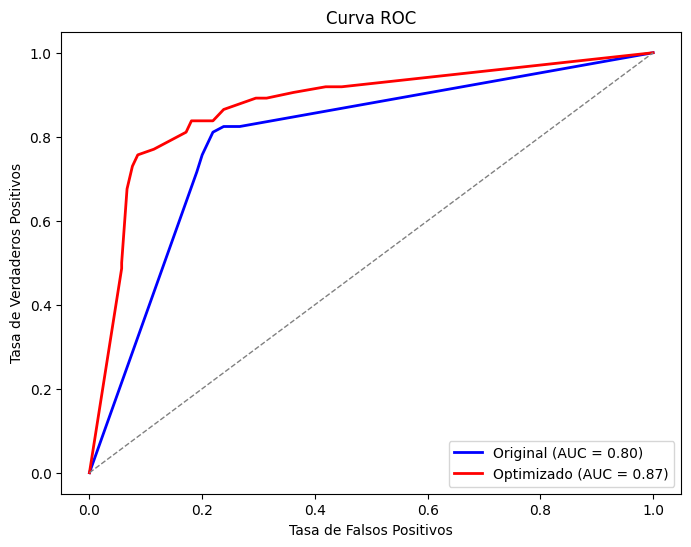

AUC del modelo original: 0.80
AUC del modelo optimizado: 0.87
El modelo optimizado mejoró la estimación.


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predicciones de probabilidad para el modelo original
y_test_prob_original = clf.predict_proba(X_test)[:, 1]
fpr_original, tpr_original, thresholds_original = roc_curve(y_test, y_test_prob_original)
roc_auc_original = auc(fpr_original, tpr_original)

# Predicciones de probabilidad para el modelo optimizado
y_test_prob_optimized = best_clf.predict_proba(X_test)[:, 1]
fpr_optimized, tpr_optimized, thresholds_optimized = roc_curve(y_test, y_test_prob_optimized)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_original, tpr_original, color='blue', lw=2, label=f'Original (AUC = {roc_auc_original:.2f})')
plt.plot(fpr_optimized, tpr_optimized, color='red', lw=2, label=f'Optimizado (AUC = {roc_auc_optimized:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Comparación de AUC
print(f"AUC del modelo original: {roc_auc_original:.2f}")
print(f"AUC del modelo optimizado: {roc_auc_optimized:.2f}")

if roc_auc_optimized > roc_auc_original:
    print("El modelo optimizado mejoró la estimación.")
elif roc_auc_optimized < roc_auc_original:
    print("El modelo optimizado empeoró la estimación.")
else:
    print("El modelo optimizado no mostró una mejora significativa en la estimación.")


## 💬 Reflexión final

### ❓ Preguntas:
- ¿Qué combinación de hiperparámetros funcionó mejor?
- ¿Cuál fue la diferencia entre el modelo base y el optimizado?
- ¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo?

In [15]:
print("La combinación de hiperparámetros que funcionó mejor fue:", grid_search.best_params_)
print("\nDiferencias entre el modelo base y el optimizado:")
print("El modelo base tenía un problema de overfitting, con una alta precisión en el conjunto de entrenamiento pero baja en el conjunto de prueba. El modelo optimizado, gracias a la búsqueda de hiperparámetros mediante GridSearchCV, logró mejorar su generalización a datos nuevos. Esto se puede ver en la diferencia de precisión y en la curva ROC.")

print("\nInterpretación del área bajo la curva ROC (AUC):")
print("El AUC del modelo representa la capacidad del modelo para distinguir entre clases. Un AUC mayor indica mejor capacidad de discriminación. En este caso, la comparación entre AUC del modelo original y optimizado nos dice si la optimización mejoró o no la capacidad del modelo para predecir correctamente la variable 'Survived'. Un AUC de 0.5 indica un rendimiento aleatorio, mientras que 1.0 es un rendimiento perfecto.")


La combinación de hiperparámetros que funcionó mejor fue: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Diferencias entre el modelo base y el optimizado:
El modelo base tenía un problema de overfitting, con una alta precisión en el conjunto de entrenamiento pero baja en el conjunto de prueba. El modelo optimizado, gracias a la búsqueda de hiperparámetros mediante GridSearchCV, logró mejorar su generalización a datos nuevos. Esto se puede ver en la diferencia de precisión y en la curva ROC.

Interpretación del área bajo la curva ROC (AUC):
El AUC del modelo representa la capacidad del modelo para distinguir entre clases. Un AUC mayor indica mejor capacidad de discriminación. En este caso, la comparación entre AUC del modelo original y optimizado nos dice si la optimización mejoró o no la capacidad del modelo para predecir correctamente la variable 'Survived'. Un AUC de 0.5 indica un rendimiento aleatorio, mientras que 1.0 es un rendimiento perfecto.
